<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


# Density Distributions

#### Import Libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<br>

#### Import Data

In [0]:
usa = pd.read_csv('./data/census_2015/acs2015_census_tract_data.csv')

<br>

#### Extract The Census Data for California

In [0]:
ca = usa[usa['State'] == 'California']

<br>

#### Initial Exploration

In [0]:
ca.head()

<br>

**Let's take a look at the column information**

In [0]:
ca.info()

<br>

**Let's check out the `value_counts()` for the `County` column.**

In [0]:
ca['County'].value_counts()

<hr>
<br>
<br>

### Plot Swarm of a single column

Seaborn is a plotting library built on top of matplotlib, check out how easy it is to plot a swarm plot, which is a great plot for visualizing a distribution based on some other column.

In [0]:
sns.swarmplot(x = "County", y = "Income", data=ca)
plt.show()

<br>

#### Limit the scope of the `ca` dataframe to only contain a few select counties.

We will be making a list containing the names of the counties that we are most interested in, as the plot above with ALL of the unique values of `County` is way too disorienting to provide any kind of meaningful information.

In [0]:
counties_to_examine = ["San Joaquin", 
                       "Los Angeles", 
                       "San Diego", 
                       "Contra Costa"]

<br>

**The pandas `.isin()` method, lets us check every value of a column against a list of values.**

Think of it as an extension of `ca['County] == 'San Diego` which only lets us check against a single value.

> This is WRONG `ca['County'] == ['San Diego','Los Angeles', etc]`

> This is RIGHT `ca['County'].isin([counties_to_examine])`

In [0]:
is_in_counties_list = ca["County"].isin(counties_to_examine)

<br>

* **TRUE:** The boolean series `is_in_counties_list` has a `True` value for any county that is contained in `counties_to_examine`, aka if the `County` value of a row in `ca` corresonds to `Los Angeles`, `San Joaquin`, `San Diego`, or `Contra Costa`, the boolean value at that same index, in `is_in_counties_list`, will be `True`.

<br>

* **FALSE:** The boolean series `is_in_counties_list` has a `False` value for any county that is NOT contained in `counties_to_examine`, aka if the `County` value of a row in `ca` corresonds to say `Orange County`, `Alameda`,`Santa Barbara`, `etc...`, the boolean value at that same index, in `is_in_counties_list`, will be `False`.

In [0]:
county_df = ca[is_in_counties_list]

<br>

**Lets go ahead and check the `unique` values of `County` in `county_df`, compare that to the `unique` values of `County` in `ca`. Its also useful to compare the `Shape`, notice that `county_df` has many fewer rows!**

In [0]:
print("----------")
print("county_df:")
print("----------")

print("Rows x Columns:", county_df.shape)
print(county_df["County"].unique())


print()


print("----------")
print("ca:")
print("----------")

print("Rows x Columns:", ca.shape)
print(ca["County"].unique())

<br>

#### Plot Swarm of a single column - again.

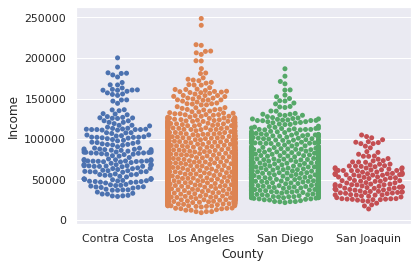

In [0]:
_ = sns.swarmplot(x = "County", y = "Income", data=county_df)
plt.show()

**A Violin Plot is similar to a swarm plot, except we give up a bit of the granularity of the Swarm Plot, in favor of IQR and Median markers.**

In [0]:
sns.violinplot(x = "County", y = "Income", data=county_df)
plt.show()

<hr>
<br>
<br>

### Plot ECDF of a single column.

> **ECDF** = Empirical Cumulative Distribution Function

In [0]:
def prep_ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

<br>

#### Prepare and Plot Income data for San Diego

In [0]:
# Prepare Income Data
is_sandiego = ca["County"] == "San Diego"

sd = ca[is_sandiego]
sd_income = sd["Income"]

x,y = prep_ecdf(sd_income)

<br>

**Lets `print()` `x` and `y` to get a better feel for what an `ECDF` is doing.**

In [0]:
print(x)
print("-"*60)
print(y)

<br>

#### Plot the ECDF for San Diego Income

In [0]:
# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()

# ax.plot() is a simple `line plot`
ax.plot(x, y, marker = ".", linestyle = "none")

# Make it Pretty
ax.set_title("ECDF of San Diego Incomes")
ax.set_xlabel("County Income")
ax.set_ylabel("ECDF")

# Remove annoying "out" stuff when printing plot.
plt.show()

<br>

## Plot ECDF for Multiple Columns

In [0]:
# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()


# For loop adds a new line plot to `ax` each iteration, 
# and adds name of each unique 'county' to 'labels' list,
# this is for use in the legend.
labels = []
for county in county_df["County"].unique():
    
    county_inc = ca[ca["County"] == county]["Income"]
    
    x,y = prep_ecdf(county_inc)
    
    ax.plot(x, y, marker = ".", linestyle = "none")

    labels.append(county)


# Make It Pretty!
# A Legend is a MUST when you have multiple plots on a single ax
ax.legend(labels, loc='lower right')
ax.set_xlabel("Incomes")
ax.set_ylabel('ECDF')
plt.show()

In [0]:
#What can we say about the incomes of these 4 counties? Take a minute to ponder this.

<br>

In General, 

**CDFs** are good for **comparing distributions and EDA**. **However CDFs are less well-known** making the results **harder to communicate**, especially to people with little Statistics expertise.

**For presentation purposes**,
Use **PMFs** for distributions with a **small amount of unique values**.
Use **KDEs** for distributions with a **large amount of unique values**.
